# 1. Data Exploration and Visualization

In [1]:
!pip install --upgrade -q transformers datasets
!pip install evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 1.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train = pd.read_csv("/kaggle/input/contradictory-my-dear-watson/train.csv")
df_test = pd.read_csv("/kaggle/input/contradictory-my-dear-watson/test.csv")

In [4]:
df_train.head()

id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-l√† font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡πà‡∏ô‡∏ö‡∏ó‡∏ö‡∏≤‡∏ó‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏Å‡πá‡πÄ‡∏ä‡πà‡∏ô‡∏Å‡∏±‡∏ô ‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÑ‡∏î‡πâ‡πÅ‡∏™‡∏î...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      0  
1  Practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3  They can't defend themselves because of their ...       en  English      0  
4    ‡πÄ‡∏î‡πá‡∏Å‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡∏ä‡∏≤‡∏ï‡∏¥‡∏û‡∏±‡∏ô‡∏ò‡∏∏‡πå‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£       th     Thai      1

In [5]:
df_test.head()

id                                            premise  \
0  c6d58c3f69  ÿ®⁄©ÿ≥ÿå ⁄©€åÿ≥€åÿå ÿ±ÿß€Å€åŸÑÿå €åÿ≥ÿπ€åÿß€Åÿå ⁄©€åŸÑ€åÿå ⁄©€åŸÑ€åÿå ÿßŸàÿ± ⁄©ŸàŸÑŸÖ...   
1  cefcc82292                             Ÿáÿ∞ÿß ŸáŸà ŸÖÿß ÿ™ŸÖ ŸÜÿµÿ≠ŸÜÿß ÿ®Ÿá.   
2  e98005252c  et cela est en grande partie d√ª au fait que le...   
3  58518c10ba                   ‰∏éÂüéÂ∏ÇÂèäÂÖ∂‰ªñÂÖ¨Ê∞ëÂèäÁ§æÂå∫ÁªÑÁªá‰ª£Ë°®Â∞±IMAÁöÑËâ∫ÊúØÂèëÂ±ïËøõË°åÂØπËØù&amp   
4  c32b0d16df                              –û–Ω–∞ –≤—Å–µ –µ—â–µ –±—ã–ª–∞ —Ç–∞–º.   

                                          hypothesis lang_abv language  
0  ⁄©€åÿ≥€å ⁄©€í ŸÑÿ¶€í ⁄©Ÿàÿ¶€å €åÿßÿØ⁄Øÿßÿ± ŸÜ€Å€å⁄∫ €ÅŸà⁄Øÿß, ⁄©ŸàŸÑŸÖ€åŸÜ €Åÿßÿ¶€å...       ur     Urdu  
1  ÿπŸÜÿØŸÖÿß Ÿäÿ™ŸÖ ÿ•ÿÆÿ®ÿßÿ±ŸáŸÖ ÿ®ŸÖÿß Ÿäÿ¨ÿ® ÿπŸÑŸäŸáŸÖ ŸÅÿπŸÑŸá ÿå ŸÅÿ¥ŸÑÿ™ ÿßŸÑ...       ar   Arabic  
2                             Les m√®res se droguent.       fr   French  
3                            IMA‰∏éÂÖ∂‰ªñÁªÑÁªáÂêà‰ΩúÔºåÂõ†‰∏∫ÂÆÉ‰ª¨ÈÉΩ‰æùÈù†ÂÖ±‰∫´ËµÑÈáë„ÄÇ       zh  Chinese  
4     –ú—ã –¥—É–º–∞–ª–∏, —á—Ç–æ –æ–Ω–∞ —É—à–ª–∞, –æ–¥–Ω–∞–∫–æ, –æ–Ω–∞ –æ—Å—Ç–∞–ª–∞—Å—å.       ru  Russian

In [6]:
def make_countplot(df, column):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.set_color_codes('pastel')
    sns.despine()
    ax = sns.countplot(data = df,
                       y = column,
                       order = df[column].value_counts().index
                      )
    
    abs_values = df[column].value_counts(ascending=False)
    rel_values = df[column].value_counts(ascending=False, normalize=True).values *100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title(f"Distribution of {column}")
    
    plt.show()

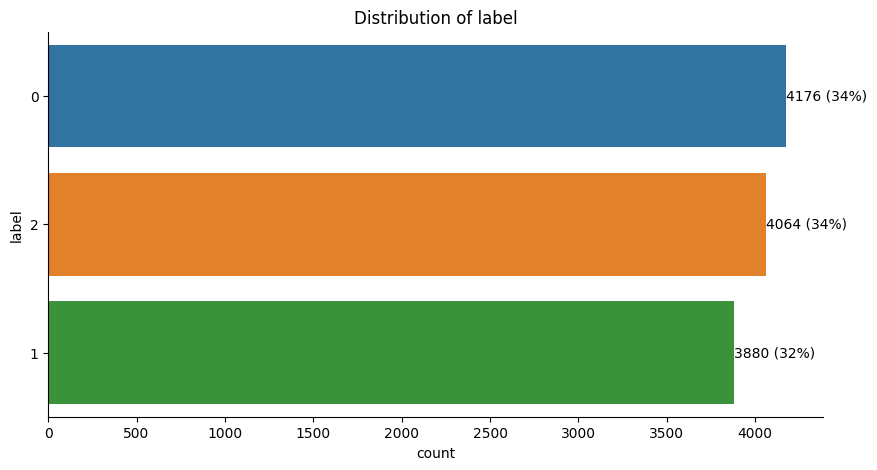

In [7]:
make_countplot(df_train, 'label')

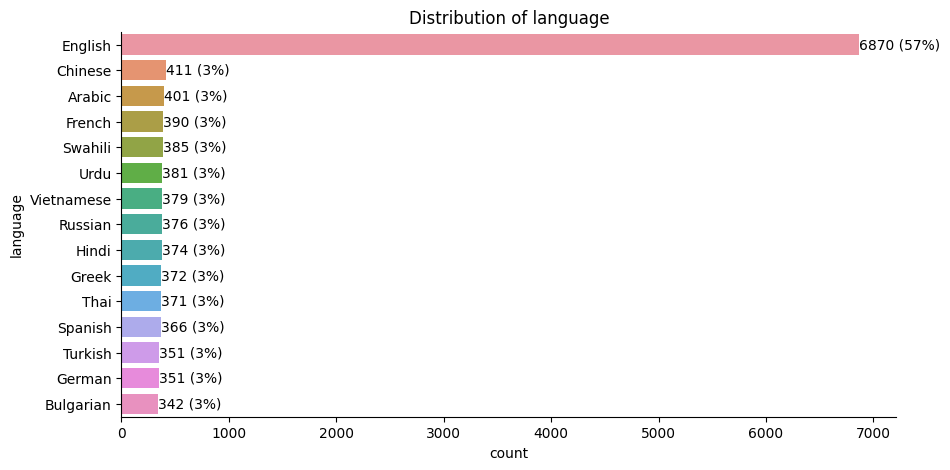

In [8]:
make_countplot(df_train, 'language')

# 2. Model

In [9]:
from datasets import load_dataset, DatasetDict

data = load_dataset('csv', data_files="/kaggle/input/contradictory-my-dear-watson/train.csv", split='train')
data = data.train_test_split(0.2)

data = DatasetDict({
    'train': data['train'], 
    'val': data['test'],
    'test': load_dataset('csv', data_files="/kaggle/input/contradictory-my-dear-watson/test.csv", split='train')
})

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [10]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'],
        num_rows: 9696
    })
    val: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language'],
        num_rows: 5195
    })
})

In [11]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding

In [12]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation=True)

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
model

config.json:   0%|          | 0.00/921 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

In [14]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [15]:
def preprocess_data(batch):
    batch['text'] =[x1 + f'{tokenizer.sep_token}' + x2 for x1, x2 in zip(batch['premise'], batch['hypothesis'])]
    return tokenizer(batch['text'])

In [16]:
data = data.map(preprocess_data, batched=True)

Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/2424 [00:00<?, ? examples/s]

Map:   0%|          | 0/5195 [00:00<?, ? examples/s]

In [17]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 9696
    })
    val: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 2424
    })
    test: Dataset({
        features: ['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'text', 'input_ids', 'attention_mask'],
        num_rows: 5195
    })
})

In [18]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate


def compute_metrics(eval_pred):
    metric = evaluate.load('accuracy')
    preds, labels = eval_pred
    preds = np.argmax(preds, axis=1)
    return metric.compute(predictions=preds, references=labels)


train_args = TrainingArguments(
    output_dir='results',
    logging_dir='logs',
    report_to=[],
    
    evaluation_strategy='steps',
    eval_steps=200,
    logging_steps=200,
    save_steps=200,
    per_device_eval_batch_size=16,
    per_device_train_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.005,
    num_train_epochs=5,
    fp16=True,
    
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    save_total_limit=3,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
trainer = Trainer(
    model=model,
    args=train_args,
    data_collator=data_collator,
    train_dataset=data['train'],
    eval_dataset=data['val'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3)]
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [20]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=1200, training_loss=0.1899860445658366, metrics={'train_runtime': 817.3853, 'train_samples_per_second': 59.311, 'train_steps_per_second': 1.853, 'total_flos': 1866691031248512.0, 'train_loss': 0.1899860445658366, 'epoch': 3.9603960396039604})

In [21]:
preds = trainer.predict(data['test'])

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


In [22]:
submission = pd.read_csv("/kaggle/input/contradictory-my-dear-watson/sample_submission.csv")
submission['prediction'] = np.argmax(preds.predictions, axis=1)

In [23]:
submission.to_csv("submission.csv", index=False)